In [64]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_score, cross_validate
import sklearn.metrics as mt
import matplotlib.pyplot as plt
import mglearn
from IPython.display import display
import numpy as np
import pandas as pd

In [3]:
classifier = SVC(kernel = 'linear')
training_points = [[1,2],[1,5],[2,2],[7,5],[9,4],[8,2]]
labels = [1,1,1,0,0,0]
classifier.fit(training_points,labels)

SVC(kernel='linear')

In [4]:
# [3,2] 가 어디에 속하는지 예측.
print(classifier.predict([[3,2]])) 

[1]


In [22]:
iris = load_iris()
col1 = 0 ;col2 = 1

x=iris.data[:,:2]
y=iris.target
# print(x,y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

model = SVC() # 모델정의
model.fit(x_train,y_train) # 학습
score1 = model.score(x_train,y_train) # 평가
print(score1)

0.8095238095238095


array([5.5, 6.3, 6.4, 6.6, 7.2, 5.7, 7.6, 5.6, 5.1, 7.7, 5.8, 5.2, 5. ,
       5.1, 5. , 6.3, 4.8, 5. , 5.1, 5.6, 5.1, 5.7, 7.7, 4.6, 6.2, 5.7,
       5.5, 6. , 5.8, 6. , 5.4, 6.2, 5.5, 5.4, 5. , 6.4, 5. , 5. , 5.5,
       6.7, 4.9, 5.8, 5. , 5. , 5.9, 5.1, 6.9, 6. , 6.1, 7.7, 5.5, 4.4,
       4.3, 6. , 7.2, 4.6, 5.1, 4.4, 6.3, 6.3, 4.6, 6.8, 6.3, 4.7, 6.1,
       6.5, 6.2, 7. , 6.4, 5.1, 6.9, 5.9, 6.5, 5.7, 5.2, 6.1, 4.5, 6.6,
       5.5, 5.3, 5.6, 7.3, 6.7, 5.1, 4.9, 6.7, 7.2, 4.9, 6.7, 4.9, 6.9,
       7.4, 6.3, 5.7, 6.5, 6.3, 6.4, 5.6, 5.9, 5.4, 6.1, 4.9, 5.8, 5.8,
       7.1])

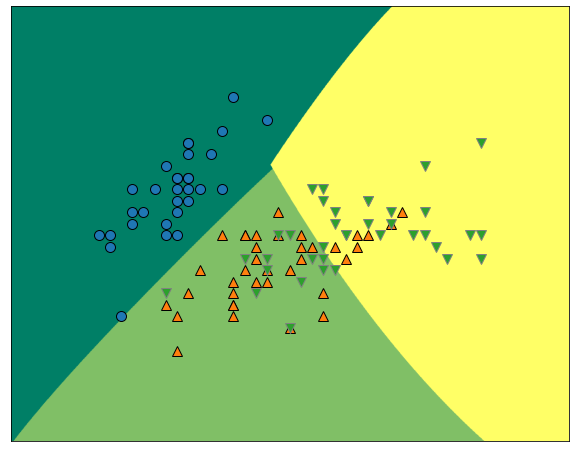

In [12]:
plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model,x_train,cm="summer")
mglearn.discrete_scatter(x_train[:,0],x_train[:,1],y_train)

0.5238095238095238

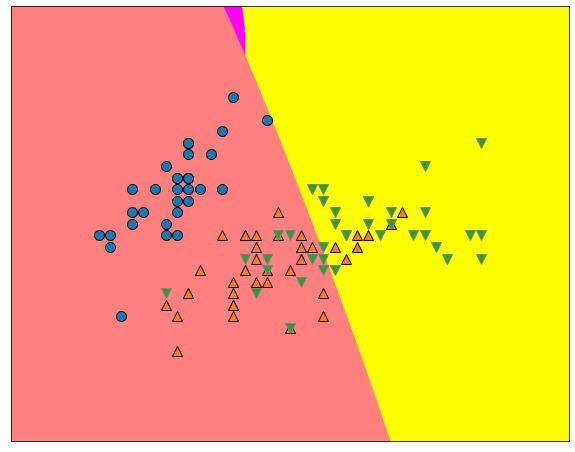

In [21]:
# 모델정이
model = SVC(C=0.05)
# 학습
model.fit(x_train,y_train)
# 평가
score = model.score(x_train,y_train)
display(score)

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model,x_train,cm="spring") 
mglearn.discrete_scatter(x_train[:,0],x_train[:,1],y_train) # 점찍기.

0.8095238095238095

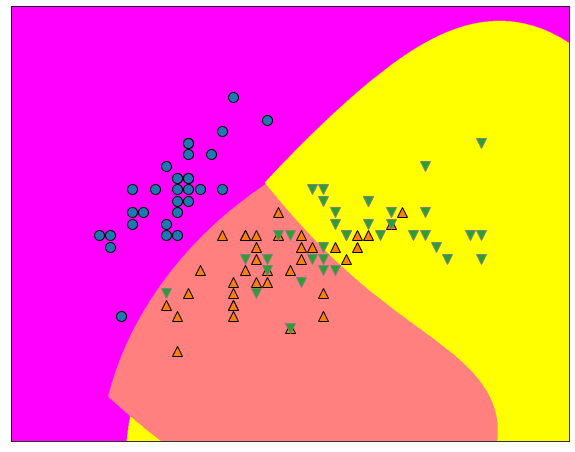

In [16]:
# c의 차이를 보자.
# 80프로 정도로 분류점수? 가 올라갔다.
model = SVC(C=10)
# 학습
model.fit(x_train,y_train)
# 평가
score = model.score(x_train,y_train)
display(score)

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model,x_train,cm="spring") 
mglearn.discrete_scatter(x_train[:,0],x_train[:,1],y_train) # 점찍기.

0.8380952380952381

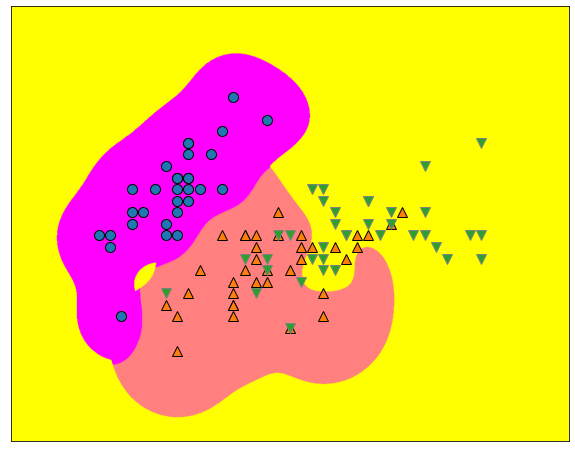

In [17]:
# 모델정이
model = SVC(gamma=10) # C값에 민감하게 그래프가 변한다.
# 학습
model.fit(x_train,y_train)
# 평가
score = model.score(x_train,y_train)
display(score)

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model,x_train,cm="spring") 
mglearn.discrete_scatter(x_train[:,0],x_train[:,1],y_train) # 점찍기.

0.9619047619047619

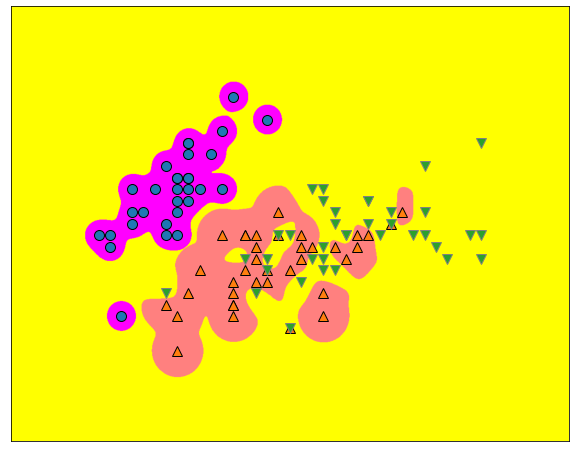

In [18]:
# 모델정이
model = SVC(gamma=100) # C값에 민감하게 그래프가 변한다.
# 학습
model.fit(x_train,y_train)
# 평가
score = model.score(x_train,y_train)
display(score)

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model,x_train,cm="spring") 
mglearn.discrete_scatter(x_train[:,0],x_train[:,1],y_train) # 점찍기.

[3.3        3.31082164 3.32164329 ... 8.67835671 8.68917836 8.7       ]
[0 0 0 ... 2 2 2]


Text(0.5, 1.0, 'kernel SVC - iris')

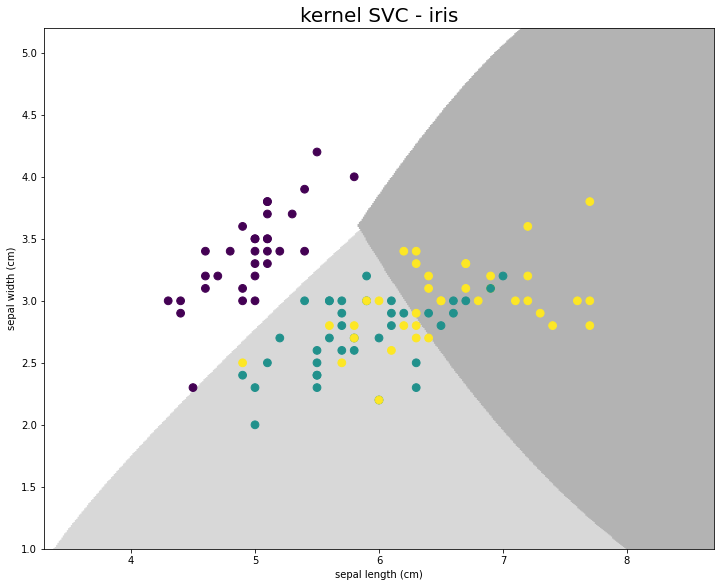

In [52]:
scale = 500
xmax = x_train[:,0].max()+1
xmin = x_train[:,0].min()-1
ymax = x_train[:,1].max()+1
ymin = x_train[:,1].min()-1

xx= np.linspace(xmin,xmax,scale) # start,stop,num start - stop 사이를 몇개의 일정한 간격 (num) 으로 나눌것인지.
yy = np.linspace(ymin,ymax,scale)
data1,data2 = np.meshgrid(xx,yy) # 격자를 찍어주는 함수.

x_grid = np.c_[data1.ravel(),data2.ravel()]
print(data1.ravel())
pred_y = model.predict(x_grid)
print(pred_y)
fig = plt.figure(figsize=[12,10])
cs=plt.imshow(pred_y.reshape(scale,scale),interpolation=None,origin='lower',
             extent=[xmin,xmax,ymin,ymax],alpha=0.3,cmap="gray_r")
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,s=60)
plt.xlabel(iris.feature_names[col1])
plt.ylabel(iris.feature_names[col2])
plt.title("kernel SVC - iris",fontsize=20)

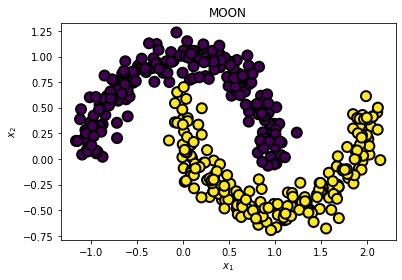

In [59]:
# 비선형 svm
from sklearn.datasets import make_moons
plt.title("MOON")
x,y=make_moons(n_samples=400,noise=0.1,random_state=0)
# s는 marker의 사이즈
# c는 색.
plt.scatter(x[:,0],x[:,1],marker='o',c=y,s=100,edgecolor="k",linewidth=2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [57]:
help("matplotlib.pyplot.scatter")

Help on function scatter in matplotlib.pyplot:

matplotlib.pyplot.scatter = scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : scalar or array-like, shape (n, )
        The data positions.
    
    s : scalar or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* sh

In [69]:
#
svm_clf = svm.SVC(kernel="linear",random_state=100)
scores = cross_val_score(svm_clf,x,y,cv =5 )
print(pd.DataFrame(cross_validate(svm_clf,x,y,cv=5)))
print('linear : ',scores.mean())
svm_clf = svm.SVC(kernel="rbf")
scores = cross_val_score(svm_clf,x,y,cv=5)
print(pd.DataFrame(cross_validate(svm_clf,x,y,cv=5)))
# cross_val_score == cross_validate 같은함수.
print('nonlinear : ',scores.mean())

   fit_time  score_time  test_score
0  0.003989    0.001000      0.8500
1  0.003998    0.001010      0.8875
2  0.003036    0.000000      0.8375
3  0.001999    0.000000      0.8625
4  0.001002    0.000999      0.9500
linear :  0.8775000000000001
   fit_time  score_time  test_score
0  0.001023    0.000985      1.0000
1  0.000994    0.000000      1.0000
2  0.001005    0.000957      1.0000
3  0.000999    0.000999      0.9750
4  0.001001    0.001000      0.9875
nonlinear :  0.9925
